### **Travail de :**
#  - Kpodjro KPATOUKPA
#  - Lyse Priscille NGASSEU NDIFO

In [ ]:
!pip -q install kagglehub opencv-python

## Q1 : Chargement d'un petit clip vidéo

In [ ]:
import os, random, kagglehub
from IPython.display import Video, display
import matplotlib.pyplot as plt
import cv2


In [ ]:
# Téléchargement
path = kagglehub.dataset_download("mistag/short-videos")

print("Path to dataset files:", path)

100%|██████████| 206M/206M [00:01<00:00, 145MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mistag/short-videos/versions/4


In [ ]:
video_dir = '/root/.cache/kagglehub/datasets/mistag/short-videos/versions/4/animals'
exts = (".mp4", ".avi", ".mov", ".mkv")
videos = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.endswith(exts)]
assert videos, "Aucune vidéo trouvée dans data/videos"

# Choisir une vidéo au hasard et l'afficher (lecteur intégré)
vid_path = random.choice(videos)

In [ ]:
vid_path

'/root/.cache/kagglehub/datasets/mistag/short-videos/versions/4/animals/giraffes_1280p.mp4'

In [ ]:
cap = cv2.VideoCapture(vid_path)

## Q2 : Lecture des métadonnées (fps, nombre de frames, durée)

In [ ]:
# images par seconde
fps = cap.get(cv2.CAP_PROP_FPS)
# nombre total de frames
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# en secondes
duration = frame_count / fps

print("FPS :", fps)
print("Nombre de frames :", frame_count)
print("Durée (s) :", duration)


FPS : 29.97002997002997
Nombre de frames : 1064
Durée (s) : 35.50213333333333


## Q3 : Affichage de la vidéo directement dans le notebook

In [23]:
print("Selected : ", os.path.basename(vid_path))
display(Video(vid_path, embed=True))

## Q4 : Extraction de 3 frames/seconde puis affichage

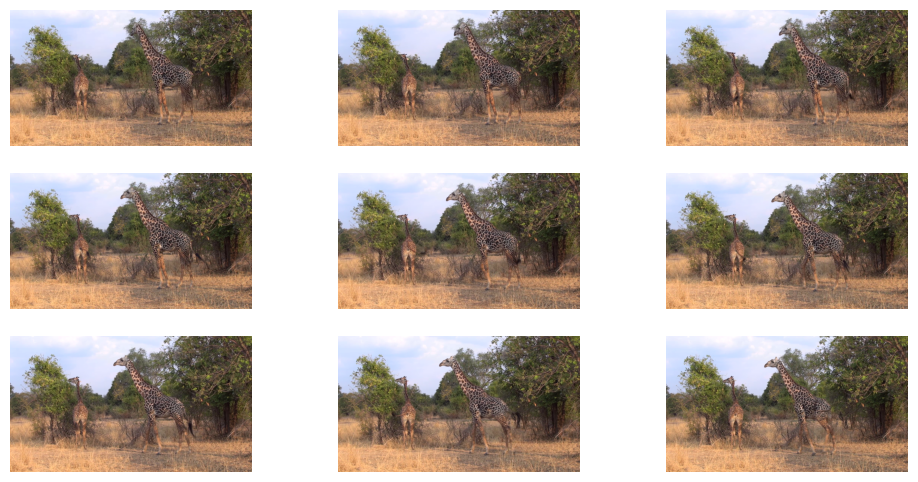

In [ ]:
# Retour au début de la vidéo
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

frames_to_show = []
frame_interval = int(fps / 3)

i = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if i % frame_interval == 0:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames_to_show.append(frame_rgb)
    i += 1

cap.release()

# Affichage des 9 premières frames extraites
plt.figure(figsize=(12,6))
for idx, frame in enumerate(frames_to_show[:9]):
    plt.subplot(3,3,idx+1)
    plt.imshow(frame)
    plt.axis("off")
plt.show()


## Q5 : Sauvegarde des frames dans un dossier

In [ ]:
output_dir = "frames_extraites"
os.makedirs(output_dir, exist_ok=True)

for idx, frame in enumerate(frames_to_show):
    save_path = os.path.join(output_dir, f"frame_{idx:04d}.jpg")
    cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

print("Frames sauvegardées dans :", output_dir)


Frames sauvegardées dans : frames_extraites
